## Independent Component Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from FastICA import *
import soundfile as sf

import matplotlib.style as style
plt.rcParams["figure.figsize"] = (16, 9)
style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

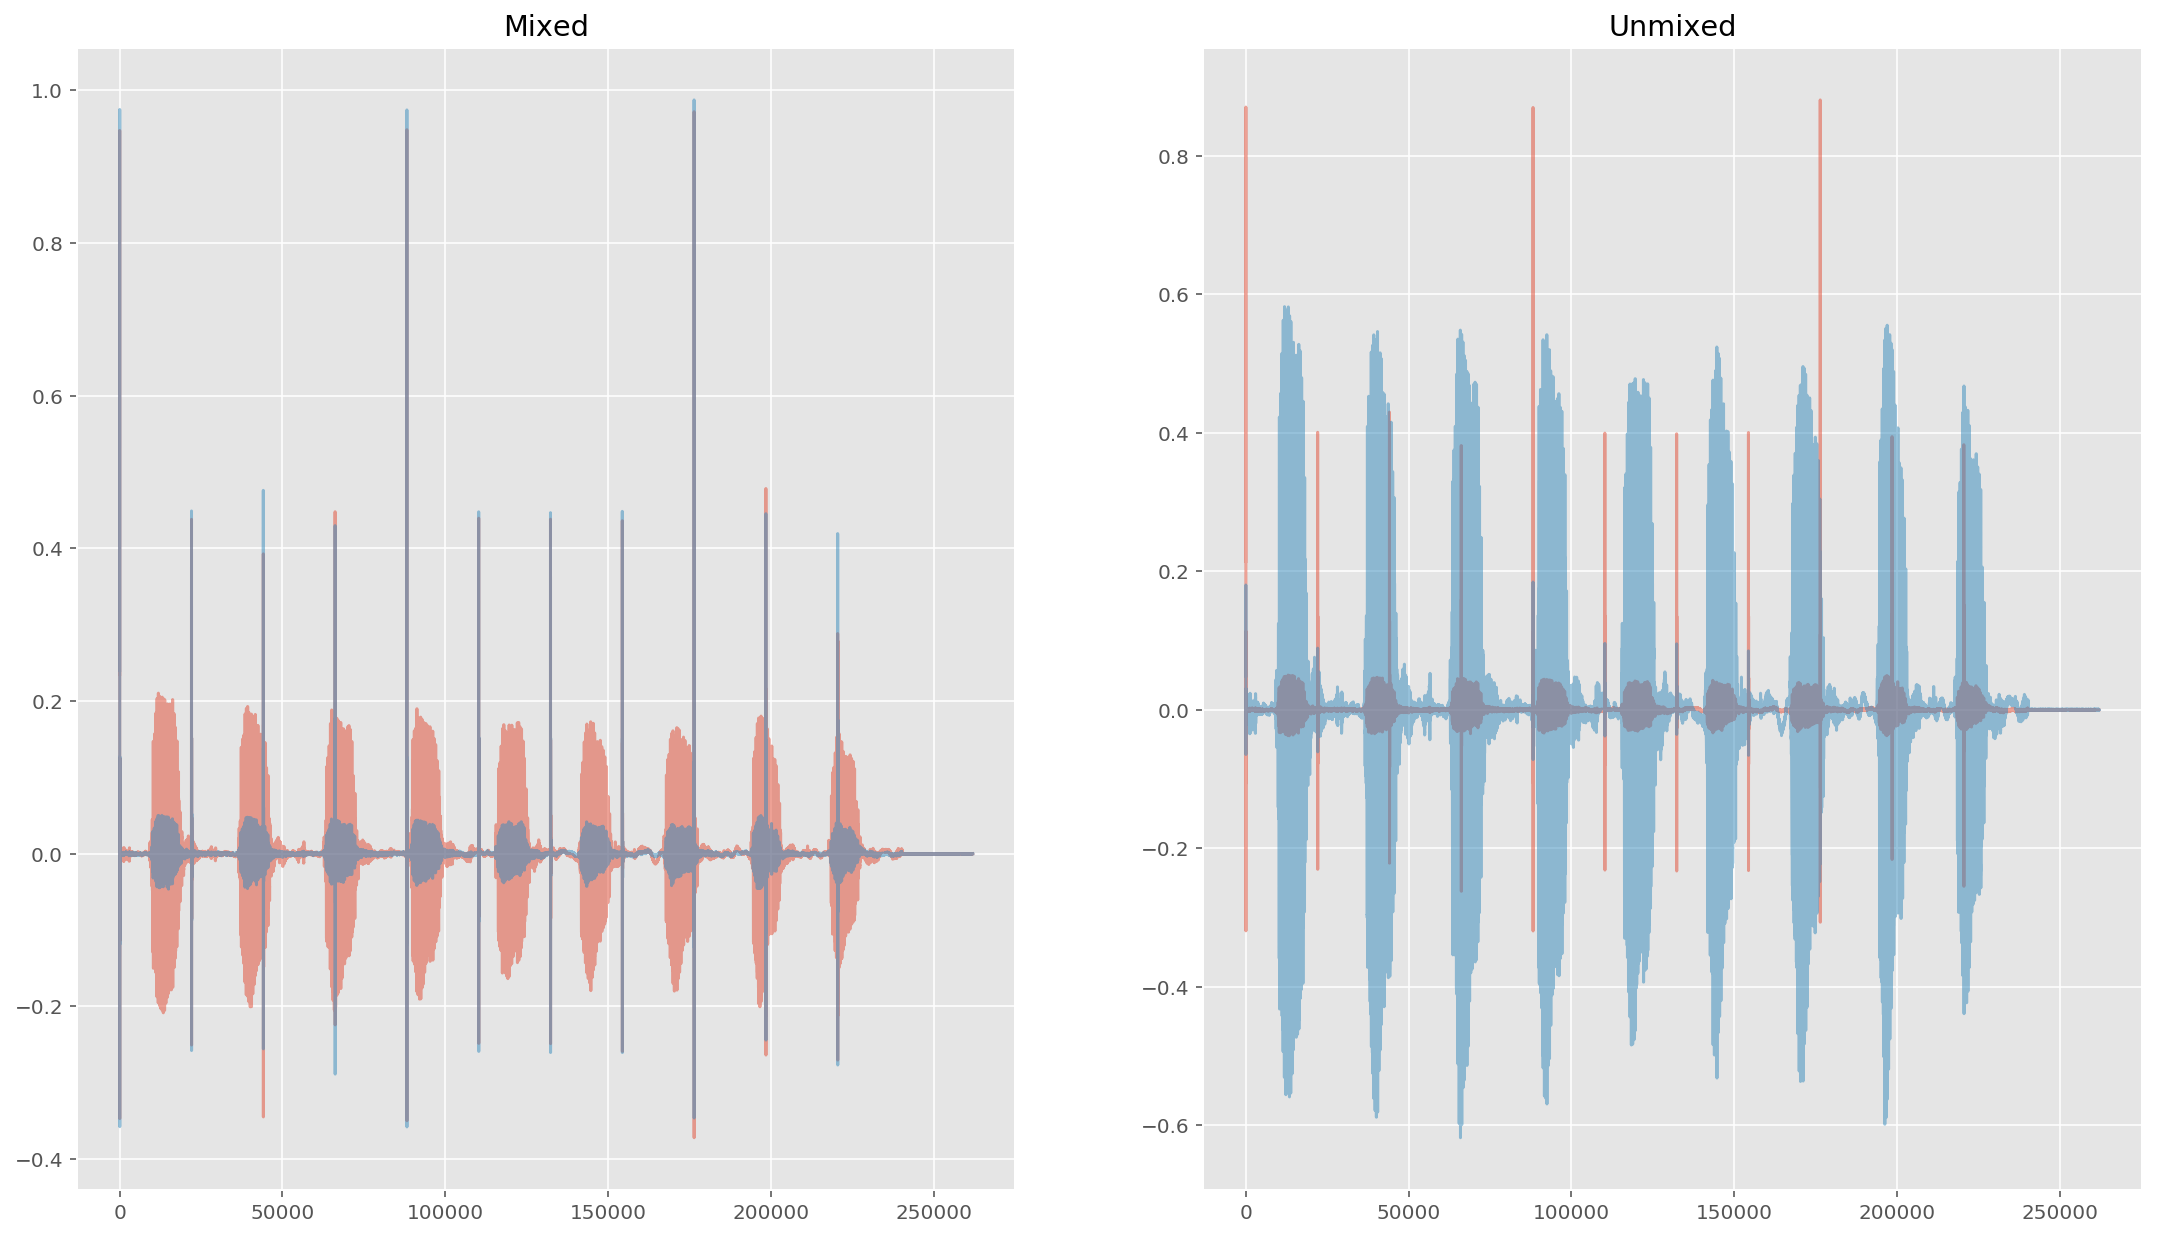

In [4]:
X1, fs = sf.read("audios/garageband1.wav")
X2, fs = sf.read("audios/garageband2.wav")

X1 = X1.reshape(-1, 1)
X2 = X2.reshape(-1, 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

X = np.r_[X1.T, X2.T]
ax1.set_title("Mixed")
ax1.plot(X.T, alpha=0.5)

Y, W = fastICA(X)
Y = normalizeAudio(Y, maximum=0.6)

ax2.set_title("Unmixed")
ax2.plot(Y.T, alpha=0.5)
fig.set_size_inches(18.5, 10.5)
plt.show()

In [5]:
sf.write("audios/unmixedGB1.wav", Y[0], fs)
sf.write("audios/unmixedGB2.wav", Y[1], fs)